 #  <center>Generating synthetic data with AgML and Helios plant simulator</center>

In [1]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
from math import pi, floor
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

Import synthetic data module from AgML. This will clone the latest version of Helios, if not installed. Otherwise, it will update to the latest version.

In [2]:
from agml._internal import syntheticdata

Installing Helios
Pulling latest version of Helios


fatal: could not read Username for 'https://github.com': Inappropriate ioctl for device


Found existing install of Helios.


Instance the data generator

In [3]:
hdg = syntheticdata.HeliosDataGenerator() 

In [4]:
def txt2image(path):
    data = np.loadtxt(path)
    data = np.where(data > 20, 0, data) # Change background numbers to zero
    return data
#     plt.imshow(data,'gray')
#     plt.pcolormesh(data, cmap='gist_rainbow')
#     plt.colorbar()
#     plt.show()

In [5]:
def genCameraPositions(type, views, z = 1):
    if type == 'circular':
        r=6
        return [[math.cos(2*pi/views*x)*r,math.sin(2*pi/views*x)*r, z] for x in range(0,views)]
    if type == 'linear':
        return [[x,-4,z] for x in range(0,views)] #Notice that the camera is at position -4 in Y axis.
            

In [6]:
def genCameraView(type, Pos):
    if type == 'circular':
        return [[0,0, Pos[x][2]] for x in range(len(Pos))]
    if type == 'linear':
        return [[Pos[x][0],0, Pos[x][2]] for x in range(len(Pos))]

In [7]:
def PlotAllViews(path, Pos):
    fig, axs = plt.subplots(floor(len(Pos)/2),len(Pos)-floor(len(Pos)/2))
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()

    for i in range(len(Pos)):
        if i<10:
            img = cv2.imread(path + 'view0000' + str(i) + '/RGB_rendering.jpeg')
            axs[i].imshow(img)
        if i>10:
            img = cv2.imread(path + 'view000' + str(i) + '/RGB_rendering.jpeg')
            axs[i].imshow(img) 

In [8]:
def PlotAllViewsSS(path, Pos):
    fig, axs = plt.subplots(floor(len(Pos)/2),len(Pos)-floor(len(Pos)/2))
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()

    for i in range(len(Pos)):
        if i<10:
            data = txt2image(path + 'view0000' + str(i) + '/semantic_segmentation.txt')
            img = data
            axs[i].imshow(img)
            im = axs[i].pcolormesh(data, cmap='gist_rainbow')

        if i>10:
            data = txt2image(path + 'view000' + str(i) + '/semantic_segmentation.txt')
            img = data
            axs[i].imshow(img,'gray')
            axs[i].pcolormesh(data, cmap='gist_rainbow')
            axs[i].colorbar()
            axs[i].show()
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)

    plt.show()

In [9]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

##  <center>Camera parameter selection</center>

Define the number of views (camera positions) in the scene

In [10]:
Camera_views = 4

A camera can be moved around the -X, Y, and Z- axis. To make an easy use of the camera in the scene, the camera is automatically rotated to a specified target point specified by the user. 

### Examples of use

#### Example 1

Imagine that the camera is mounted on a vehicle that is moving straight in a row. In this sense, the user should specified the camera positions and the point which the camera is looking at. For this case, the camera looking will be varying according to the position of the camera. In the illustration below, it can be seen the camera position and with an arrow the point that the camera is looking at each instant.

/tmp/ipykernel_26024/2963316718.py:8: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


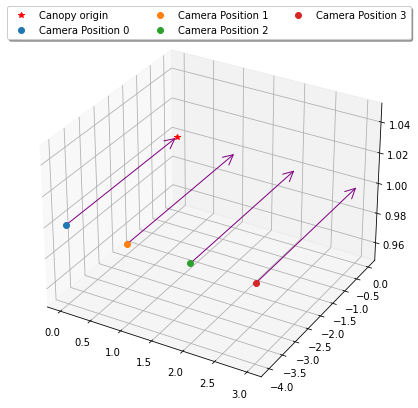

In [11]:
plt.rcParams['figure.figsize'] = [7, 7]
type = 'linear'
Pos = genCameraPositions(type, Camera_views)
Look = genCameraView(type, Pos)
ax = plt.axes(projection='3d')
ax.plot3D(0,0,1, 'r*', label = 'Canopy origin')
for i in range(len(Pos)):
    ax.plot3D(Pos[i][0],Pos[i][1],Pos[i][2], 'o', label = 'Camera Position ' + str(i))
    #ax.plot3D([Pos[i][0], Look[i][0]],[Pos[i][1], Look[i][1]],[Pos[i][2], Look[i][2]], label = ['Camera View ' + str(i)])
    arw = Arrow3D([Pos[i][0], Look[i][0]],[Pos[i][1], Look[i][1]],[Pos[i][2], Look[i][2]], arrowstyle="->", color="purple", lw = 1, mutation_scale=25)
    ax.add_artist(arw)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

#### Example 2

Now, lets consider that you want to map one orchard while moving around of it. For this case, the camera position will be changing, but the camera will always be looking at the same position. In the illustration below, it can be seen the camera position and with an arrow the point that the camera is looking at each instant.

/tmp/ipykernel_26024/2963316718.py:8: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


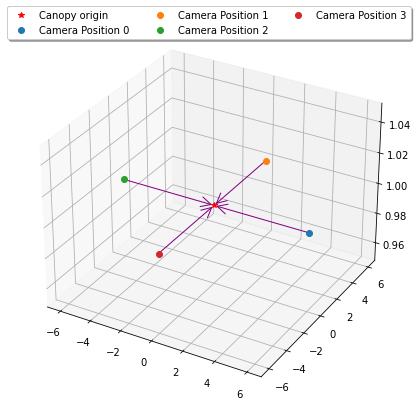

In [12]:
plt.rcParams['figure.figsize'] = [7, 7]
type = 'circular'
Pos = genCameraPositions(type, Camera_views)
Look = genCameraView(type, Pos)
ax = plt.axes(projection='3d')
ax.plot3D(0,0,1, 'r*', label = 'Canopy origin')
for i in range(len(Pos)):
    ax.plot3D(Pos[i][0],Pos[i][1],Pos[i][2], 'o', label = 'Camera Position ' + str(i))
    #ax.plot3D([Pos[i][0], Look[i][0]],[Pos[i][1], Look[i][1]],[Pos[i][2], Look[i][2]], label = ['Camera View ' + str(i)])
    arw = Arrow3D([Pos[i][0], Look[i][0]],[Pos[i][1], Look[i][1]],[Pos[i][2], Look[i][2]], arrowstyle="->", color="purple", lw = 1, mutation_scale=25)
    ax.add_artist(arw)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

In [13]:
#---------------- CAMERA PARAMETERS --------------------
#camera_positions = [[0,-4,1],[1,-4,1],[2,-4,1]]
#camera_lookat = [[0,0,1],[1,0,1],[2,0,1]]
camera_positions = Pos
camera_lookat = Look
hdg.camera_param_ranges['camera_position'] = camera_positions
hdg.camera_param_ranges['camera_lookat'] = camera_lookat 
hdg.camera_param_ranges['image_resolution'] = [500, 500]


##  <center>Canopy parameters</center>

The idea behind this plugin is to make it easier to generate a representative dataset. For this reason, the parameters of the differents crops can be generated within a range. For example:

#### Parameter with a single value.

leaf_spacing_fraction = $\left[ \left[ 0, 1 \right] \right]$ $\rightarrow$ This will randomly generate a value in that range.

So, if the user want a specific value. It should be specified as:

leaf_spacing_fraction = $\left[ \left[ 0.4, 0.4 \right] \right]$ $\rightarrow$ This will generate a value of 0.4

#### Parameter with a multiple values.

grape_color = $\left[ \left[ 0.2, 0.3 \right], \left[ 0.5, 1 \right], \left[ 0, 1 \right] \right]$ $\rightarrow$ This will randomly generate a value within each range for R, G, and B, respectively.

So, if the user want a specific value. It should be specified as:

grape_color = $\left[ \left[ 0.2, 0.2 \right], \left[ 0.5, 0.5 \right], \left[ 1, 1 \right] \right]$ $\rightarrow$ This will generate a value of R =0.2, G = 0.5, and B = 1

#### The canopy generator code

For generating the images, please consider the following:
<ol>
  <li>Three type of annotations are available: 'semantic', 'object', 'instance'</li>
  <li>Different elements can be label in the scene: 'leaves, branches, trunk, fruits' \
<span style="color:red"> *** Please note that crops like strawberry and tomato do not have a 'trunk' label, only 'branches'</span>.</li>
  <li>The directory can be specified by the user, if not specified the latest valid directory will be used. For the first time will be in Helios/projects/Sy... folder</li>
    <li>The parameter <\n_imgs> allows the user to define the number of of time the selected geometry and cameras views will executed. Each time the geometry will be changed by Helios, if not saved before. If the output location is not changed in each iteration, the images will be overwritten. <span style="color:red"> Is recommended to have n_imgs=1</span></li>
</ol>







### VSP Grapevine

Parameters that you can modify in this crop:

    <VSPGrapevineParameters>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <cluster_height_max>0.15</cluster_height_max>
      <cluster_radius>0.03</cluster_radius>
      <cordon_height>0.9</cordon_height>
      <cordon_radius>0.02</cordon_radius>
      <grape_color>0.18 0.2 0.25</grape_color>
      <grape_radius>0.0075</grape_radius>
      <grape_subdivisions>8.0</grape_subdivisions>
      <leaf_spacing_fraction>0.5</leaf_spacing_fraction>
      <leaf_subdivisions>1.0 1.0</leaf_subdivisions>
      <leaf_width>0.18</leaf_width>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.5036436274306861</plant_height>
      <plant_spacing>2.0</plant_spacing>
      <row_spacing>2.0</row_spacing>
      <shoot_length>0.9</shoot_length>
      <shoot_radius>0.005</shoot_radius>
      <shoots_per_cordon>10.0</shoots_per_cordon>
      <trunk_height>0.7</trunk_height>
      <trunk_radius>0.05</trunk_radius>
      <wood_subdivisions>10.0</wood_subdivisions>
    </VSPGrapevineParameters>
    

In [14]:
# ---------------- CANOPY TYPE  -------------------
k = 'VSPGrapevine'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[1, 1],[1, 1]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='leaves, branches, trunk, fruits', output_directory='..') 

0
1
2
3
Generation synthetic data: #0
-- Symbol prefix: 


-- Loading 3 plug-ins
-- loading plug-in visualizer


-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h
-- Using X11 for window creation


DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib


make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_params_image.xml...Building canopy of VSP grapevine...done.
Canopy consists of 369 leaves and 235864 total primitives.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 235.964K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00003/RGB_rendering.jpeg
done.
Generating labeled image containing 4 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and element: 
branch

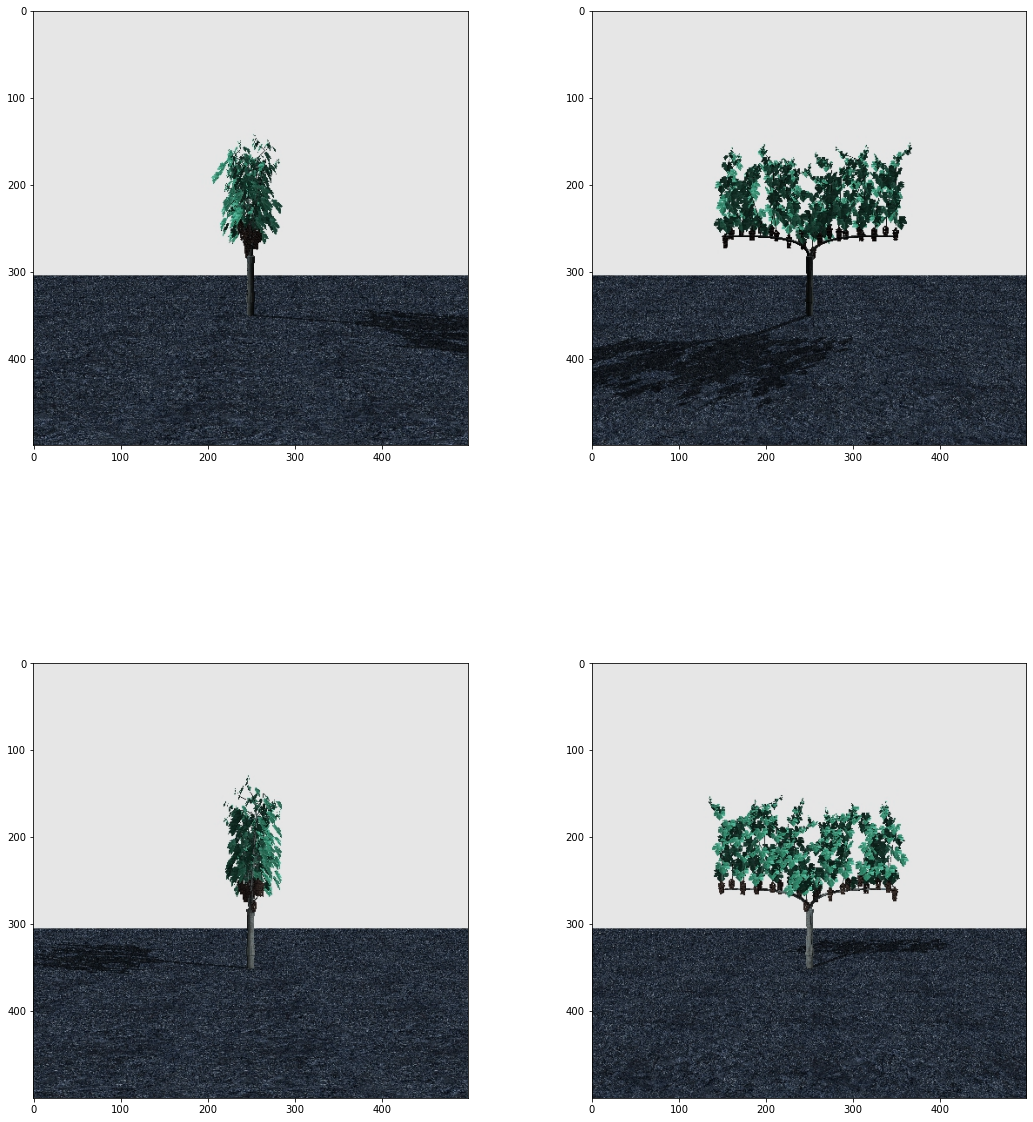

In [15]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViews(path, camera_positions)

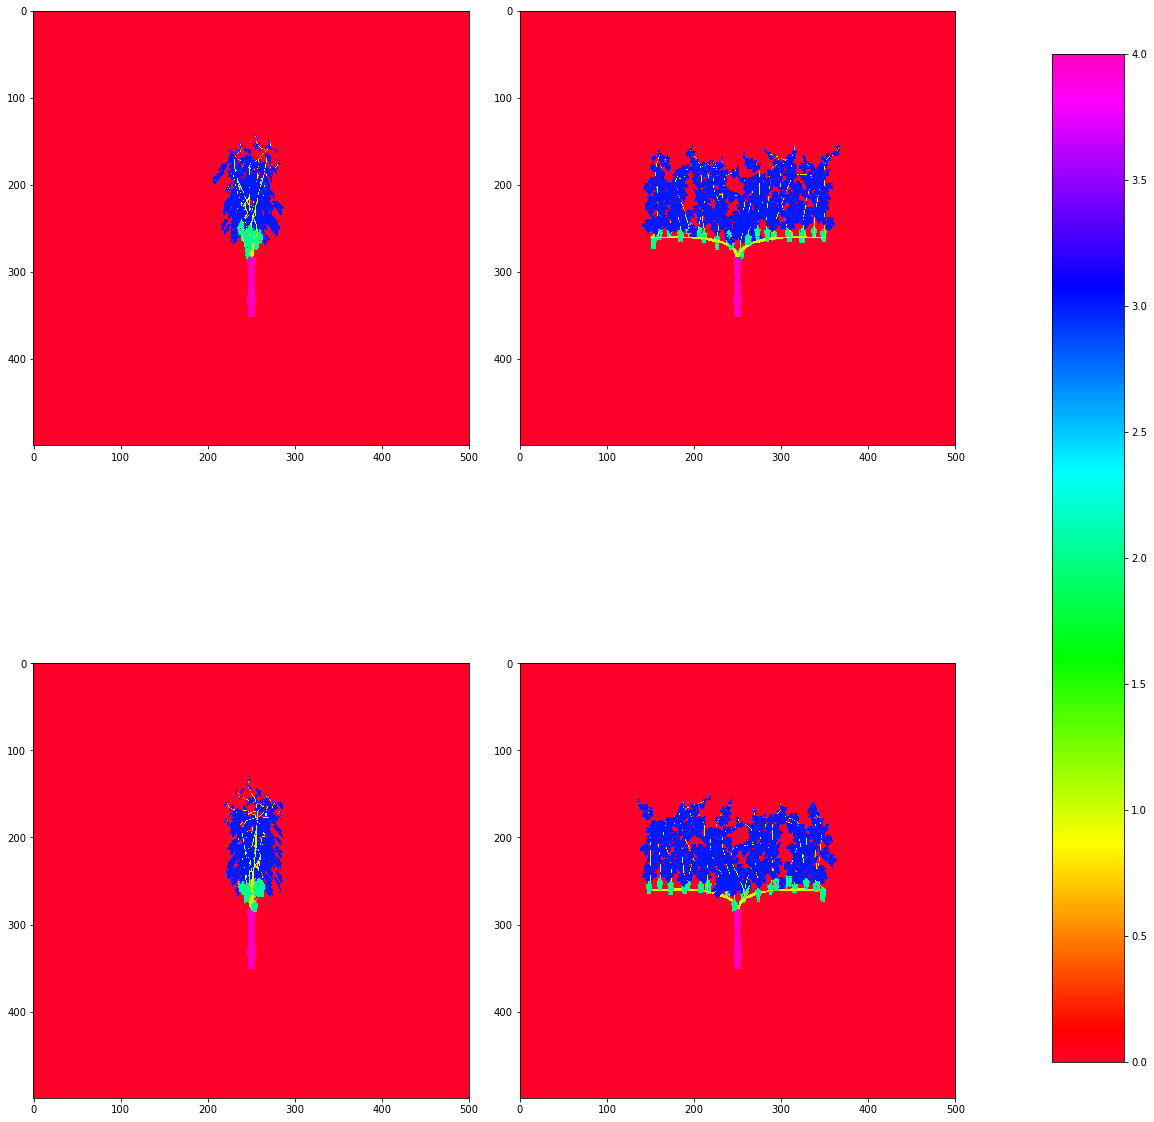

In [16]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViewsSS(path, camera_positions)

### Split Grapevine

Parameters that you can modify in this crop:

    <SplitGrapevineParameters>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <cluster_height_max>0.1</cluster_height_max>
      <cluster_radius>0.03</cluster_radius>
      <cordon_height>1.5</cordon_height>
      <cordon_radius>0.02</cordon_radius>
      <cordon_spacing>10.0</cordon_spacing>
      <grape_color>0.18 0.2 0.25</grape_color>
      <grape_radius>0.0075</grape_radius>
      <grape_subdivisions>8.0</grape_subdivisions>
      <leaf_spacing_fraction>0.6</leaf_spacing_fraction>
      <leaf_subdivisions>1.0 1.0</leaf_subdivisions>
      <leaf_width>0.18</leaf_width>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.0056300102423439</plant_height>
      <plant_spacing>2.0</plant_spacing>
      <row_spacing>4.0</row_spacing>
      <shoot_angle_base>0.0</shoot_angle_base>
      <shoot_angle_tip>1.256636</shoot_angle_tip>
      <shoot_length>1.2</shoot_length>
      <shoot_radius>0.0025</shoot_radius>
      <shoots_per_cordon>10.0</shoots_per_cordon>
      <trunk_height>1.3</trunk_height>
      <trunk_radius>0.05</trunk_radius>
      <wood_subdivisions>10.0</wood_subdivisions>
    </SplitGrapevineParameters>

In [17]:
# ---------------- CANOPY TYPE  -------------------
k = 'SplitGrapevine'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[1, 1],[1, 1]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
hdg.canopy_param_ranges[k]['cordon_spacing'] = [[0.5, 1.0]]

# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='fruits', output_directory='..') 

0
Generation synthetic data: #0
-- Symbol prefix: 


-- Loading 3 plug-ins
-- loading plug-in visualizer


-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h
-- Using X11 for window creation


DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib


make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_params_image.xml...Building canopy of split trellis grapevine...done.
Canopy consists of 646 leaves and 475610 total primitives.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 475.71K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00003/RGB_rendering.jpeg
done.
Generating labeled image containing 1 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and element

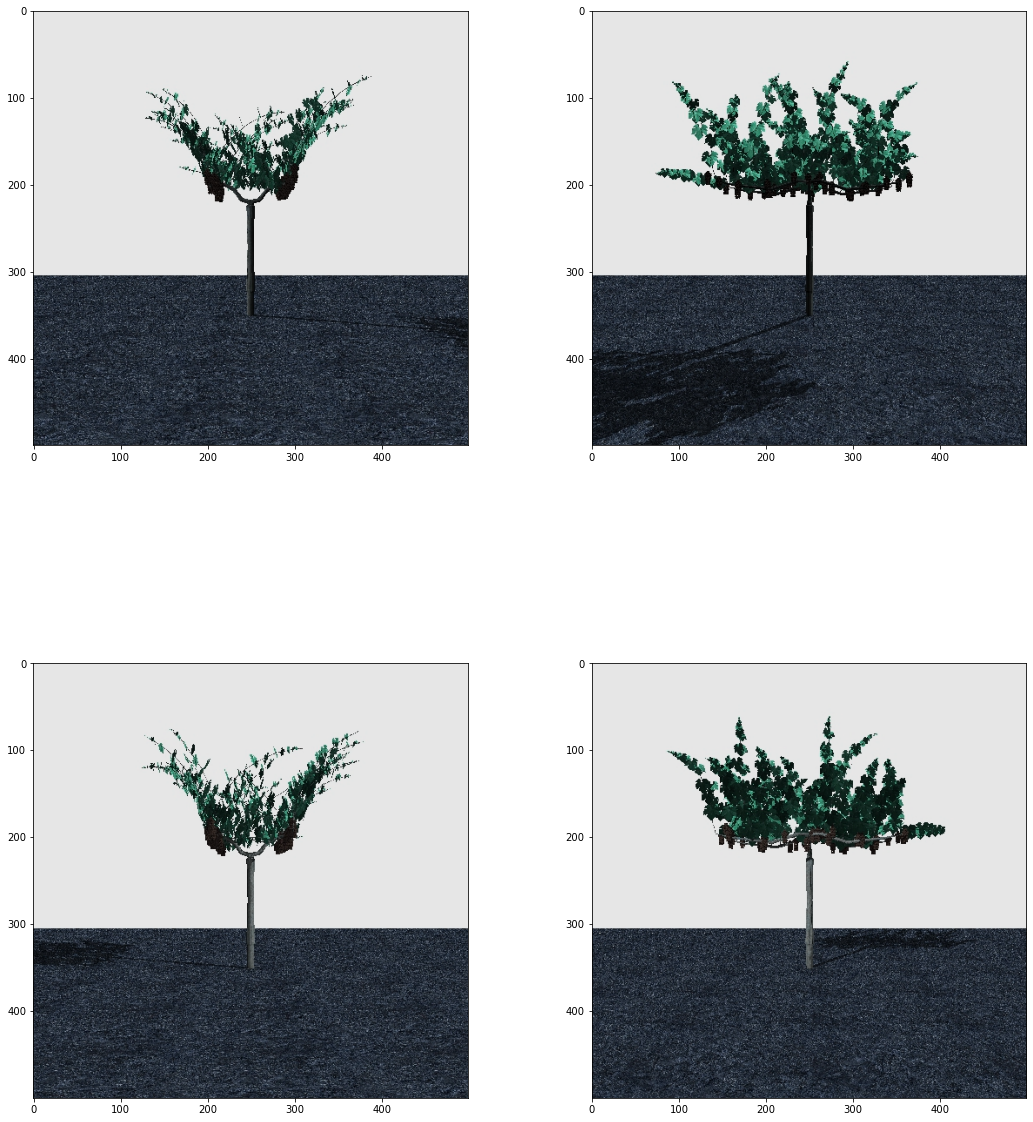

In [18]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViews(path, camera_positions)

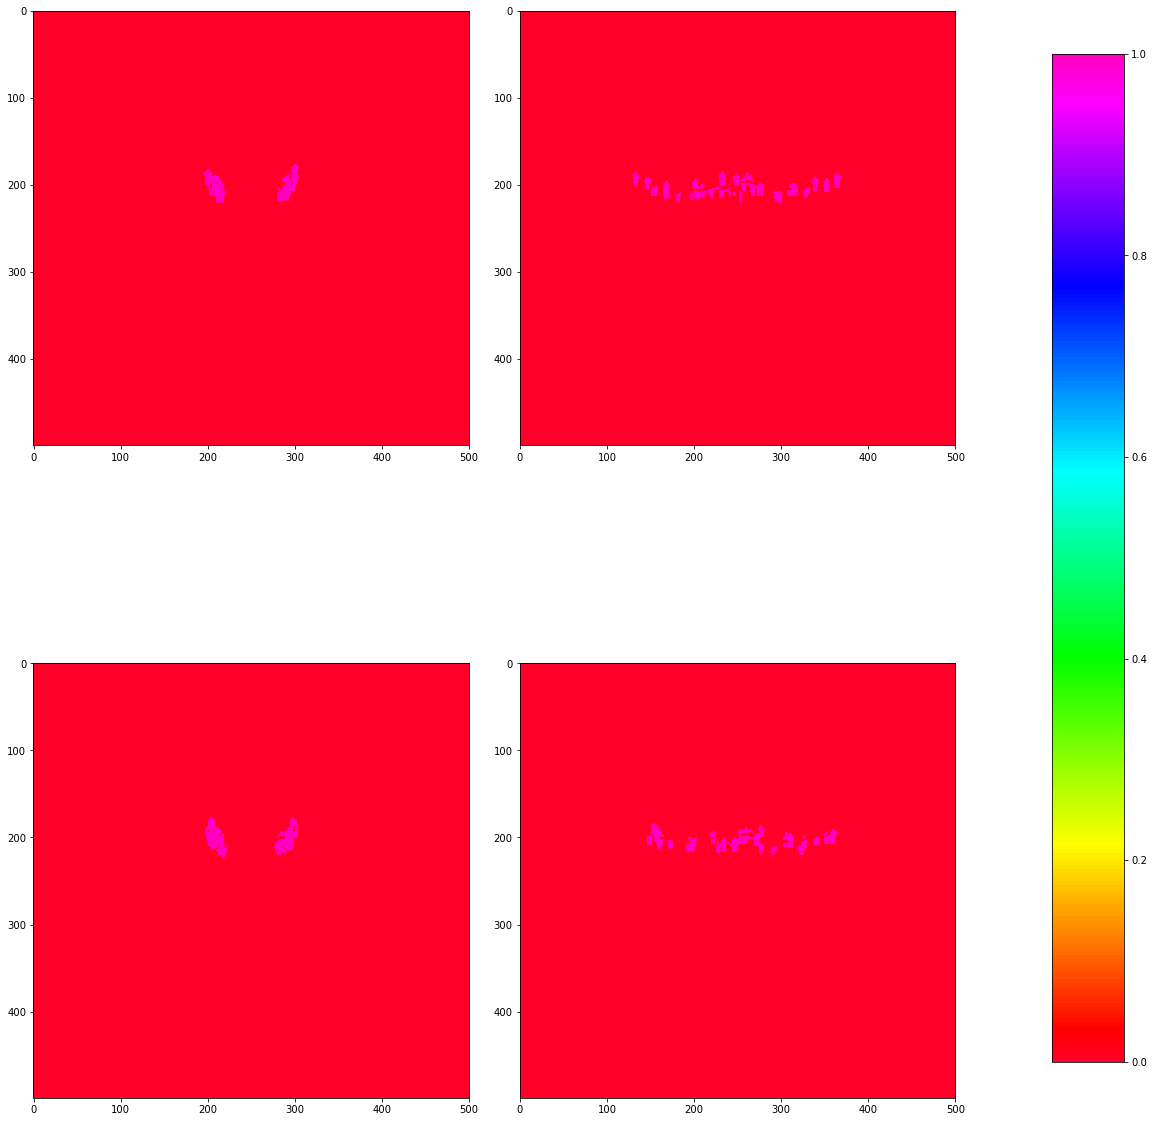

In [19]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViewsSS(path, camera_positions)

### Goblet Grapevine

Parameters that you can modify in this crop:

    <GobletGrapevineParameters>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <cluster_height_max>0.1</cluster_height_max>
      <cluster_radius>0.03</cluster_radius>
      <cordon_height>0.9</cordon_height>
      <cordon_radius>0.02</cordon_radius>
      <grape_color>0.18 0.2 0.25</grape_color>
      <grape_radius>0.0075</grape_radius>
      <grape_subdivisions>8.0</grape_subdivisions>
      <leaf_spacing_fraction>0.6</leaf_spacing_fraction>
      <leaf_subdivisions>1.0 1.0</leaf_subdivisions>
      <leaf_width>0.18</leaf_width>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.2170181971310814</plant_height>
      <plant_spacing>2.0</plant_spacing>
      <row_spacing>2.0</row_spacing>
      <shoot_length>0.9</shoot_length>
      <shoot_radius>0.0025</shoot_radius>
      <shoots_per_cordon>10.0</shoots_per_cordon>
      <trunk_height>0.7</trunk_height>
      <trunk_radius>0.05</trunk_radius>
      <wood_subdivisions>10.0</wood_subdivisions>
    </GobletGrapevineParameters>

In [20]:
# ---------------- CANOPY TYPE  -------------------
k = 'GobletGrapevine'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[1, 1],[1, 1]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='branches, trunk, fruits', output_directory='..') 

0
1
2
Generation synthetic data: #0
-- Symbol prefix: 


-- Loading 3 plug-ins
-- loading plug-in visualizer


-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h


DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Using X11 for window creation
-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib


make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_params_image.xml...Building canopy of goblet trellis grapevine...done.
Canopy consists of 325 leaves and 243025 total primitives.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 243.125K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00003/RGB_rendering.jpeg
done.
Generating labeled image containing 3 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and eleme

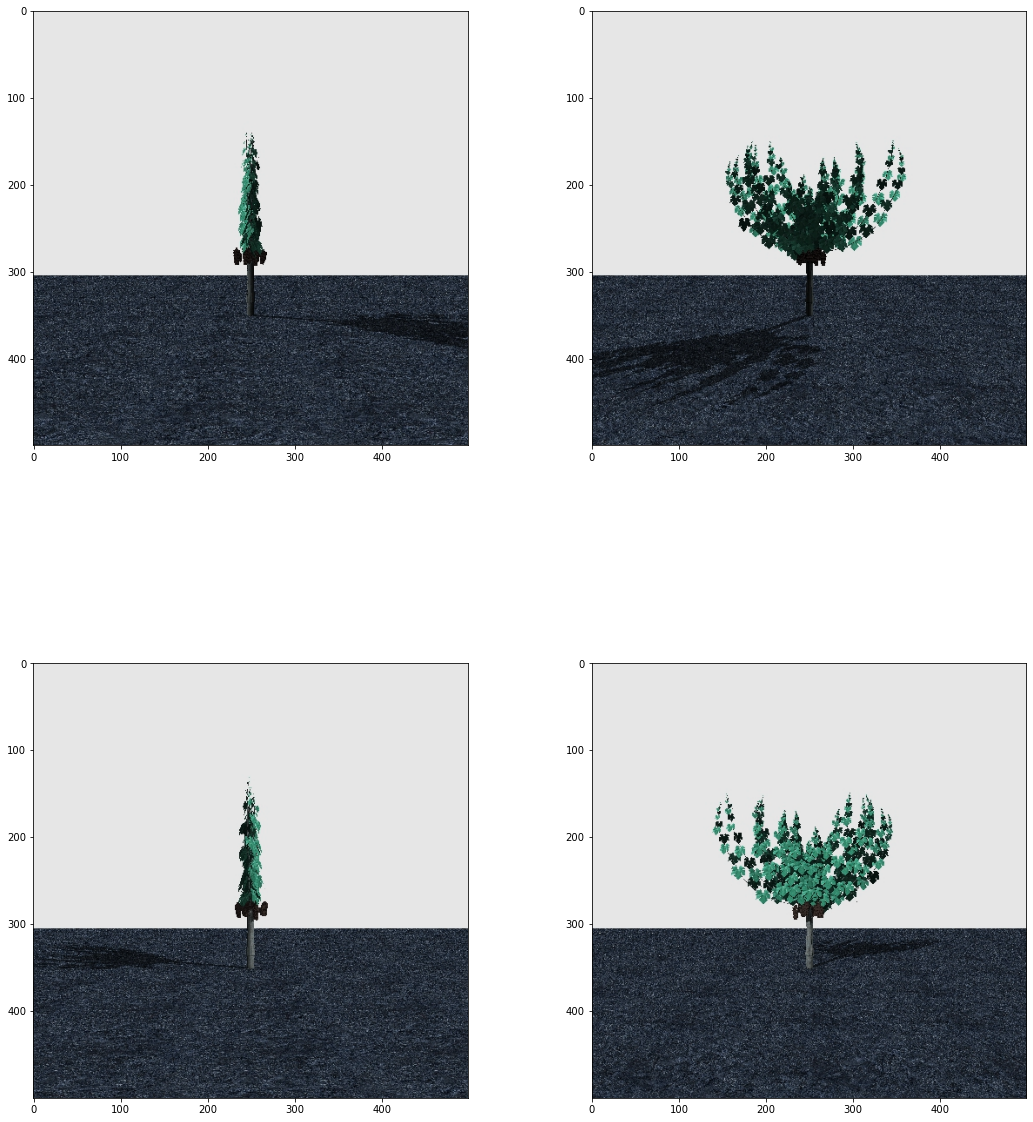

In [21]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViews(path, camera_positions)

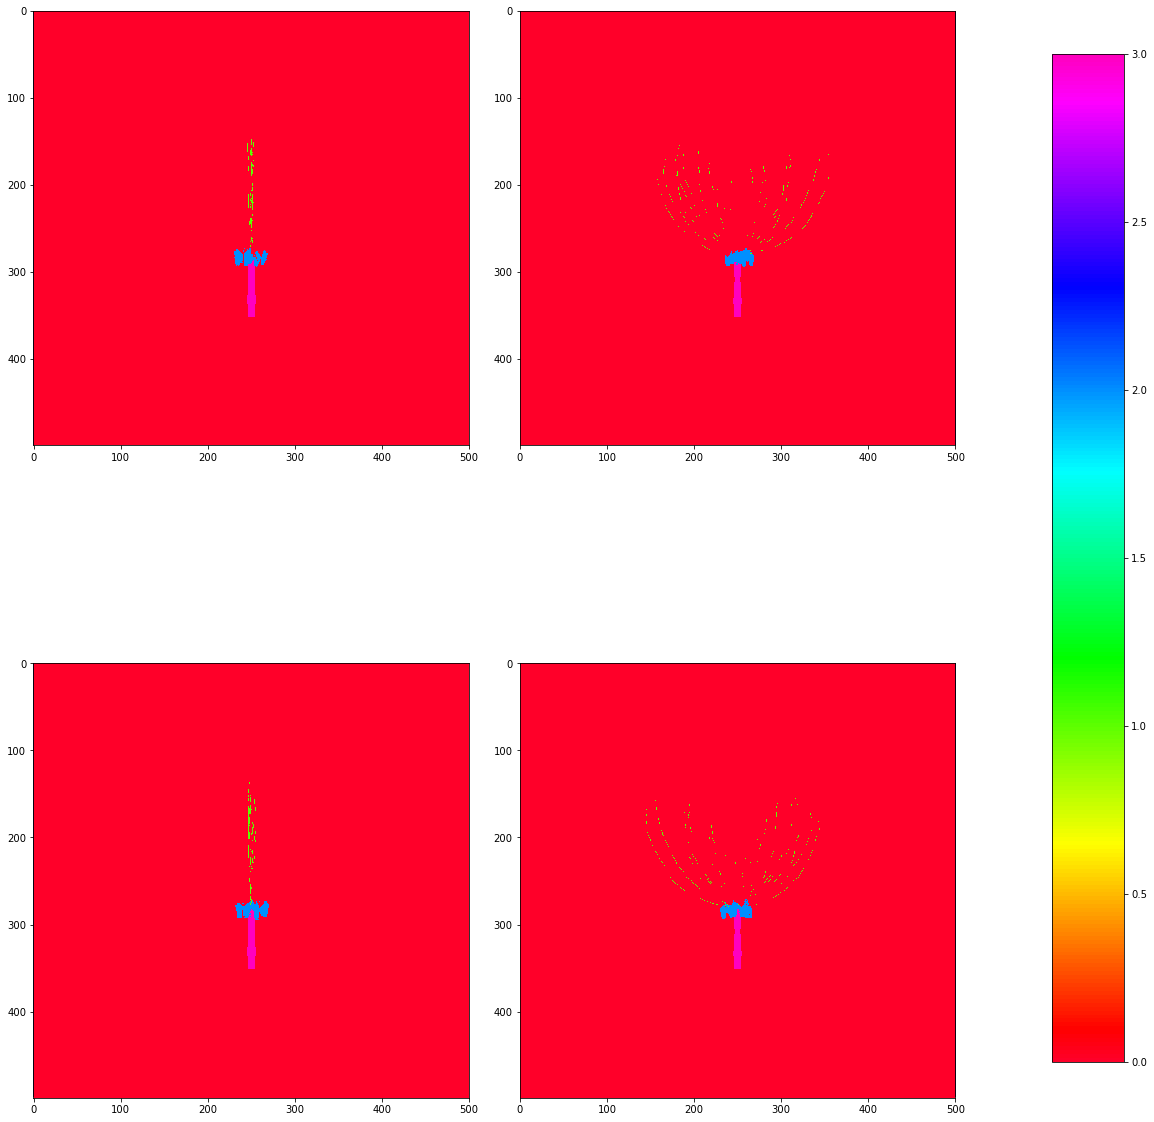

In [22]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViewsSS(path, camera_positions)

### Unilateral Grapevine

Parameters that you can modify in this crop:

    <UnilateralGrapevineParameters>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <cluster_height_max>0.1</cluster_height_max>
      <cluster_radius>0.03</cluster_radius>
      <cordon_height>0.9</cordon_height>
      <cordon_radius>0.04</cordon_radius>
      <grape_color>0.18 0.2 0.25</grape_color>
      <grape_radius>0.0075</grape_radius>
      <grape_subdivisions>8.0</grape_subdivisions>
      <leaf_spacing_fraction>0.6</leaf_spacing_fraction>
      <leaf_subdivisions>1.0 1.0</leaf_subdivisions>
      <leaf_width>0.18</leaf_width>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.080883282796714</plant_height>
      <plant_spacing>1.5</plant_spacing>
      <row_spacing>2.0</row_spacing>
      <shoot_length>0.9</shoot_length>
      <shoot_radius>0.0025</shoot_radius>
      <shoots_per_cordon>20.0</shoots_per_cordon>
      <trunk_height>0.7</trunk_height>
      <trunk_radius>0.05</trunk_radius>
      <wood_subdivisions>10.0</wood_subdivisions>
    </UnilateralGrapevineParameters>

In [23]:
# ---------------- CANOPY TYPE  -------------------
k = 'UnilateralGrapevine'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[1, 1],[1, 1]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='leaves, branches, trunk, fruits', output_directory='..') 

0
1
2
3
Generation synthetic data: #0
-- Symbol prefix: 


-- Loading 3 plug-ins
-- loading plug-in visualizer


-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h


DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Using X11 for window creation
-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib


make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_params_image.xml...Building canopy of unilateral trellis grapevine...done.
Canopy consists of 322 leaves and 241126 total primitives.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 241.226K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00003/RGB_rendering.jpeg
done.
Generating labeled image containing 4 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and e

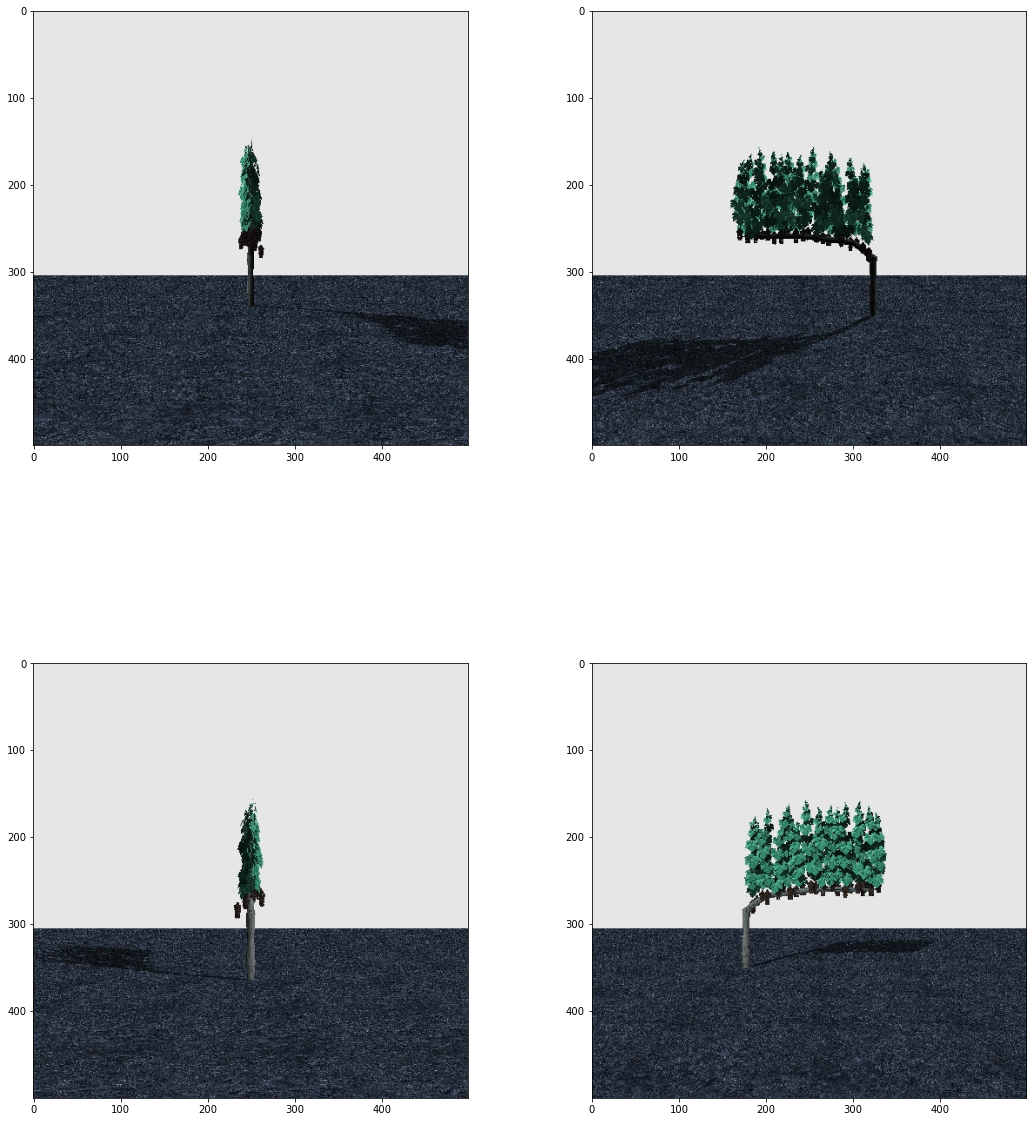

In [24]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViews(path, camera_positions)

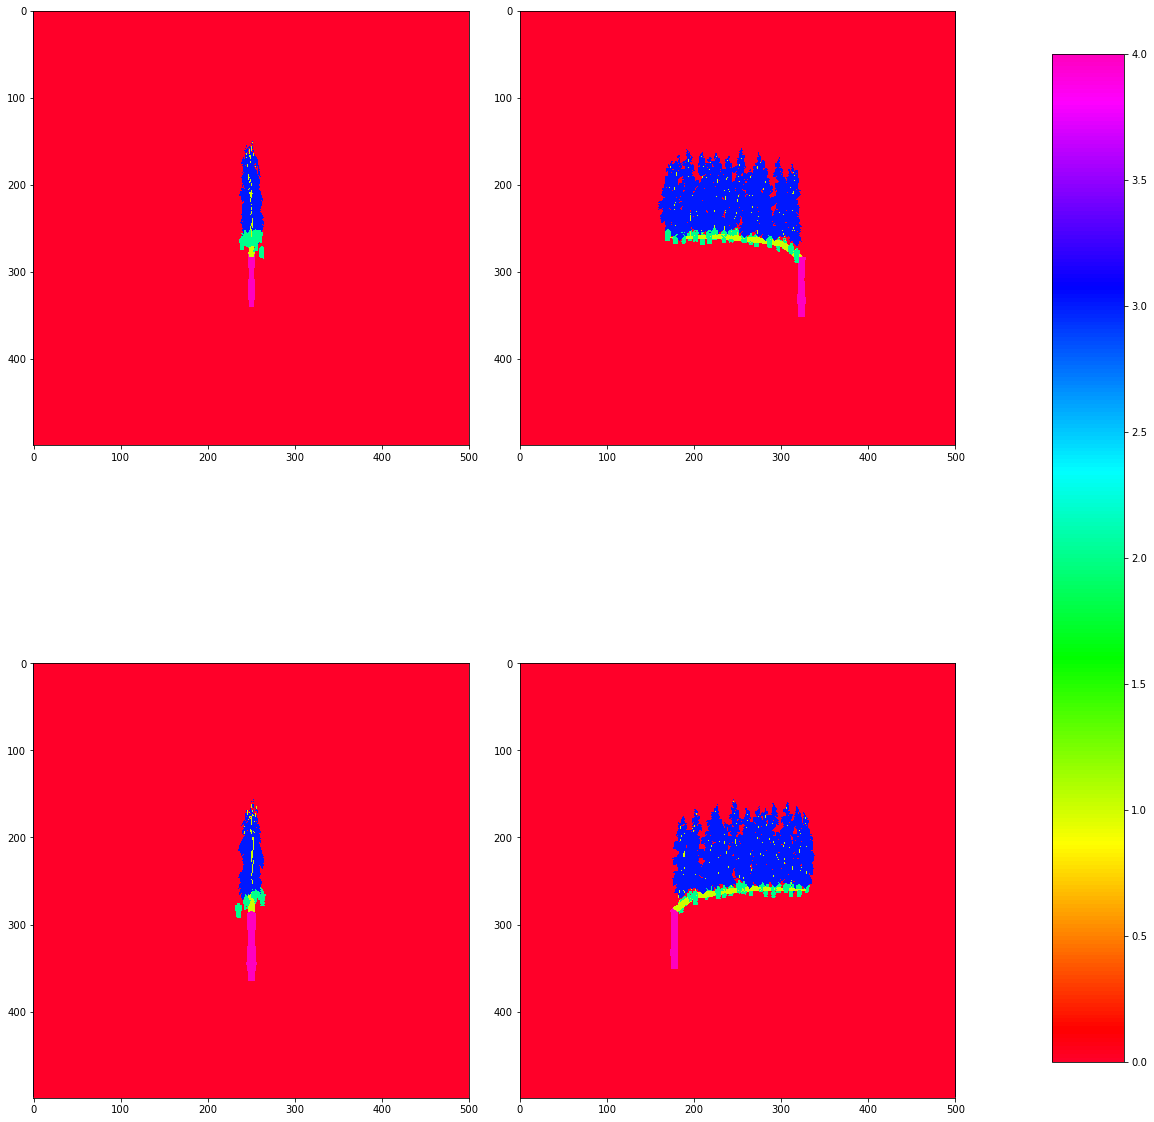

In [25]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViewsSS(path, camera_positions)

### Walnut

Parameters that you can modify in this crop:

    <WalnutCanopyParameters>
      <branch_length>4.0 0.75 0.75</branch_length>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <fruit_radius>0.04</fruit_radius>
      <fruit_subdivisions>16.0</fruit_subdivisions>
      <leaf_length>0.15</leaf_length>
      <leaf_subdivisions>1.0 2.0</leaf_subdivisions>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.5284251522113472</plant_height>
      <plant_spacing>6.0</plant_spacing>
      <row_spacing>8.0</row_spacing>
      <trunk_height>40.0</trunk_height>
      <trunk_radius>0.15</trunk_radius>
      <wood_subdivisions>10.0</wood_subdivisions>
    </WalnutCanopyParameters>

In [28]:
# ---------------- CANOPY TYPE  -------------------
k = 'WalnutCanopy'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[1, 1],[1, 1]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
hdg.canopy_param_ranges[k]['trunk_height'] = [[1, 1]]
# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='branches, trunk, fruits', output_directory='..') 

0
1
2
Generation synthetic data: #0
-- Symbol prefix: 


-- Loading 3 plug-ins
-- loading plug-in visualizer


-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h
-- Using X11 for window creation


DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib


make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_params_image.xml...Building canopy of walnut trees...done.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 408.752K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00003/RGB_rendering.jpeg
done.
Generating labeled image containing 3 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and element: 
branches
clusters
trunks
Semantic segmentation ... done.
Performin

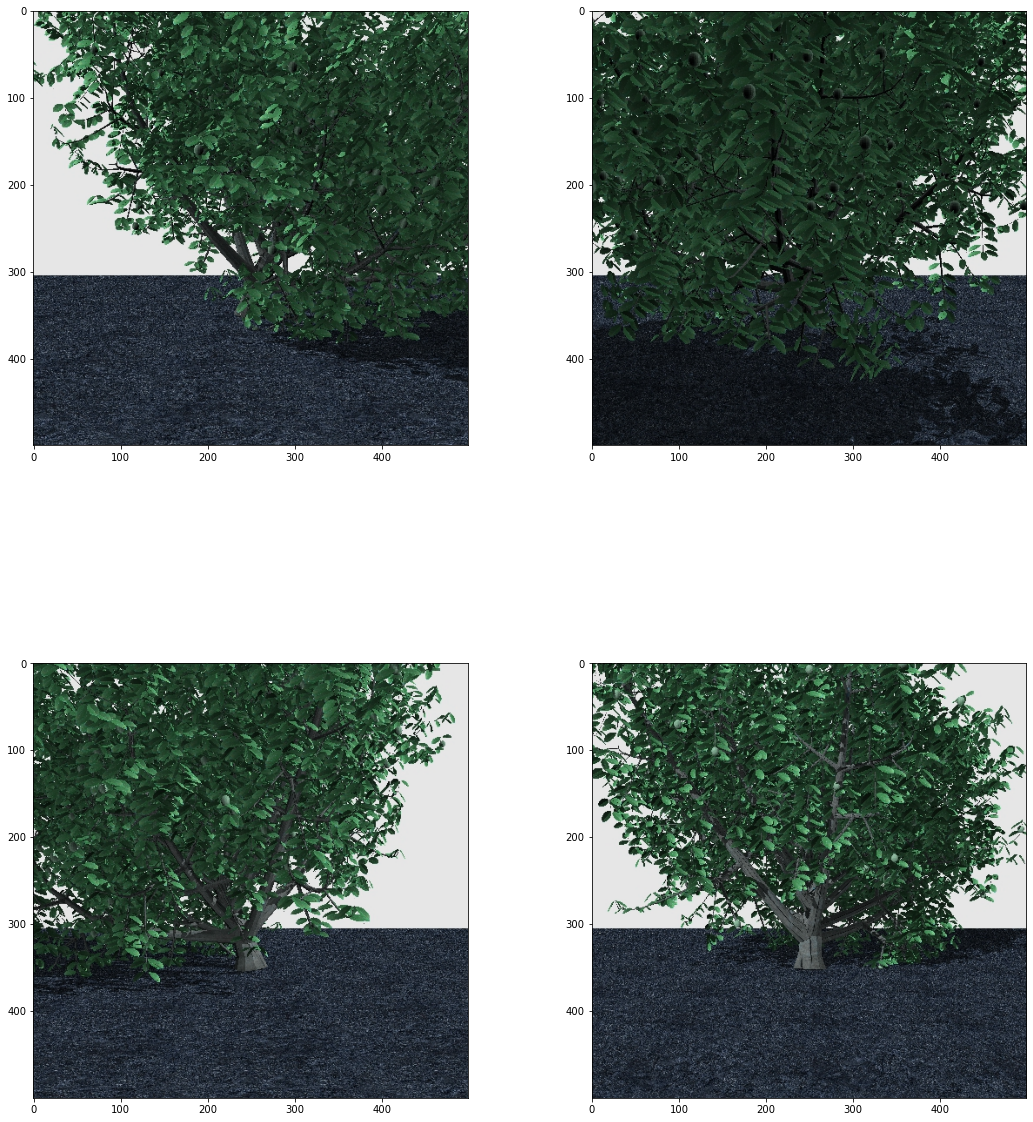

In [29]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViews(path, camera_positions)

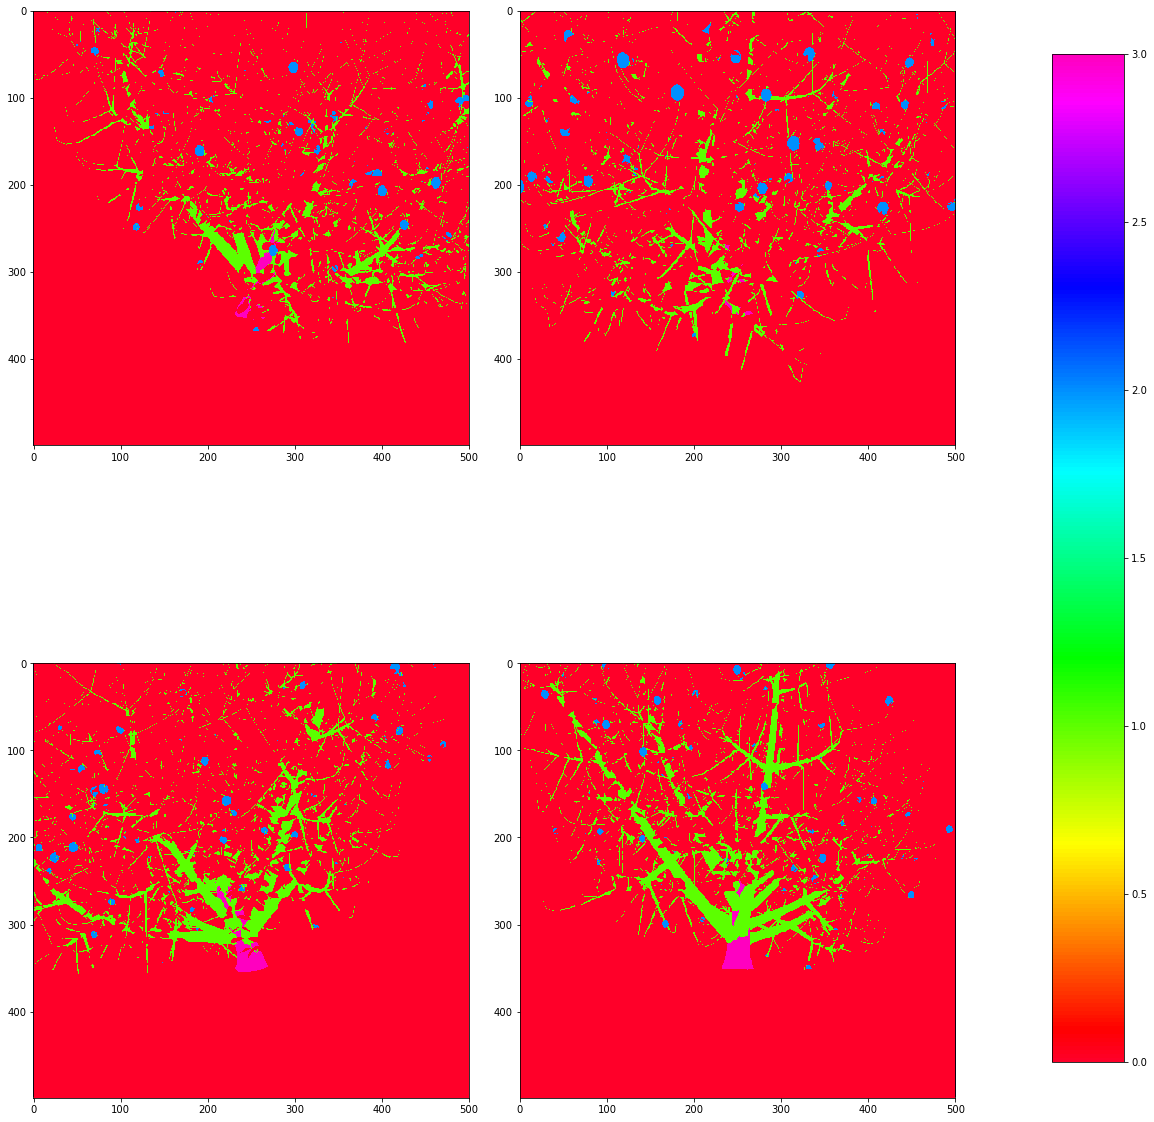

In [30]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViewsSS(path, camera_positions)

### Tomato

Parameters that you can modify in this crop:

    <TomatoParameters>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <fruit_color>0.7 0.28 0.2</fruit_color>
      <fruit_radius>0.03</fruit_radius>
      <fruit_subdivisions>8.0</fruit_subdivisions>
      <leaf_length>0.2</leaf_length>
      <leaf_subdivisions>4.0 3.0</leaf_subdivisions>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.9909318224703498</plant_height>
      <plant_spacing>2.0</plant_spacing>
      <row_spacing>2.0</row_spacing>
      <shoot_color>0.35 0.45 0.2</shoot_color>
      <shoot_subdivisions>10.0</shoot_subdivisions>
    </TomatoParameters>

In [31]:
# ---------------- CANOPY TYPE  -------------------
k = 'Tomato'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[4, 1],[1, 1]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='leaves, branches, fruits', output_directory='..') 

0
1
2
Generation synthetic data: #0
-- Symbol prefix: 


-- Loading 3 plug-ins
-- loading plug-in visualizer


-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h
-- Using X11 for window creation


DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib


make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_params_image.xml...Building canopy of tomato plants...done.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 11.892K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00003/RGB_rendering.jpeg
done.
Generating labeled image containing 3 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and element: 
branches
clusters
leaves
Semantic segmentation ... done.
Performin

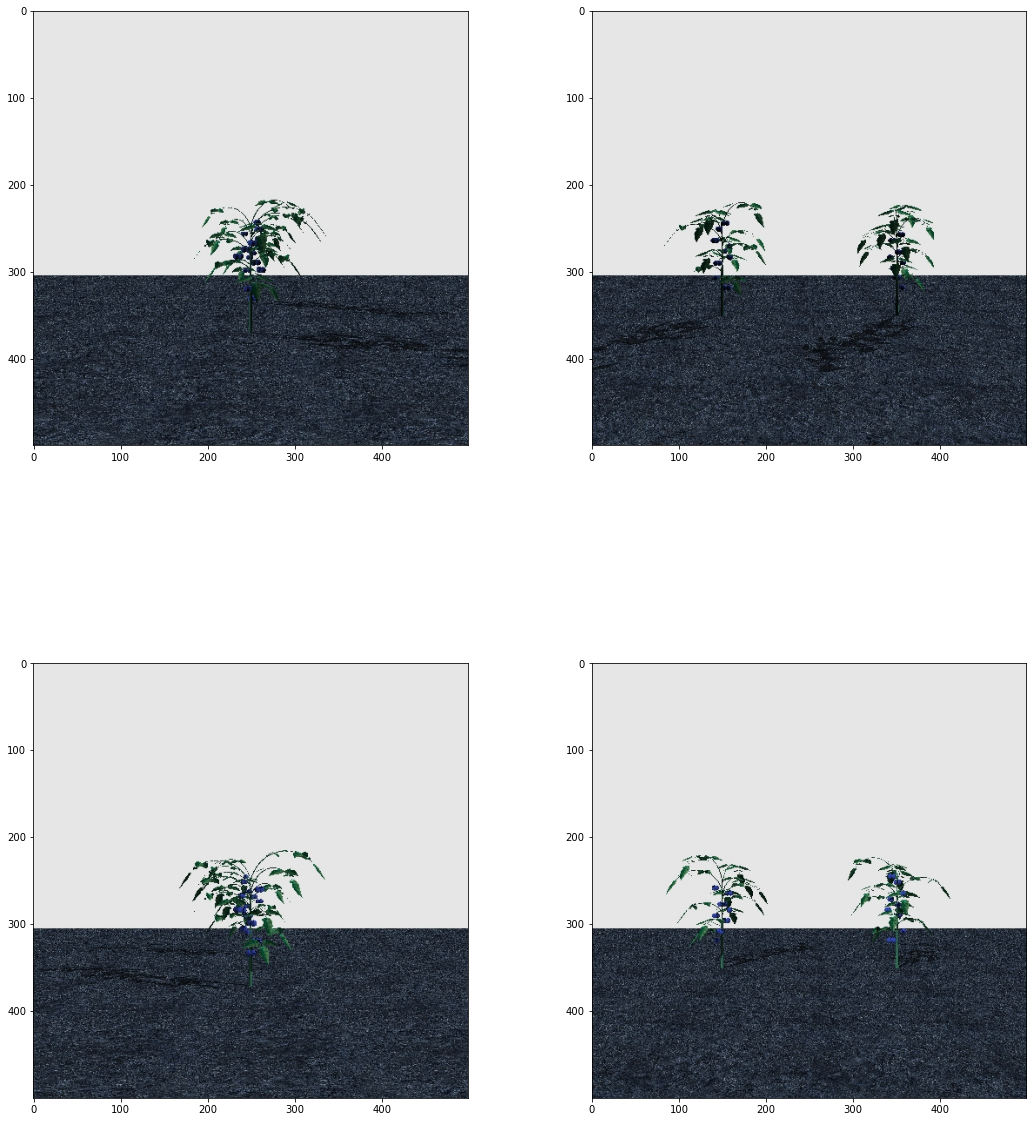

In [32]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViews(path, camera_positions)

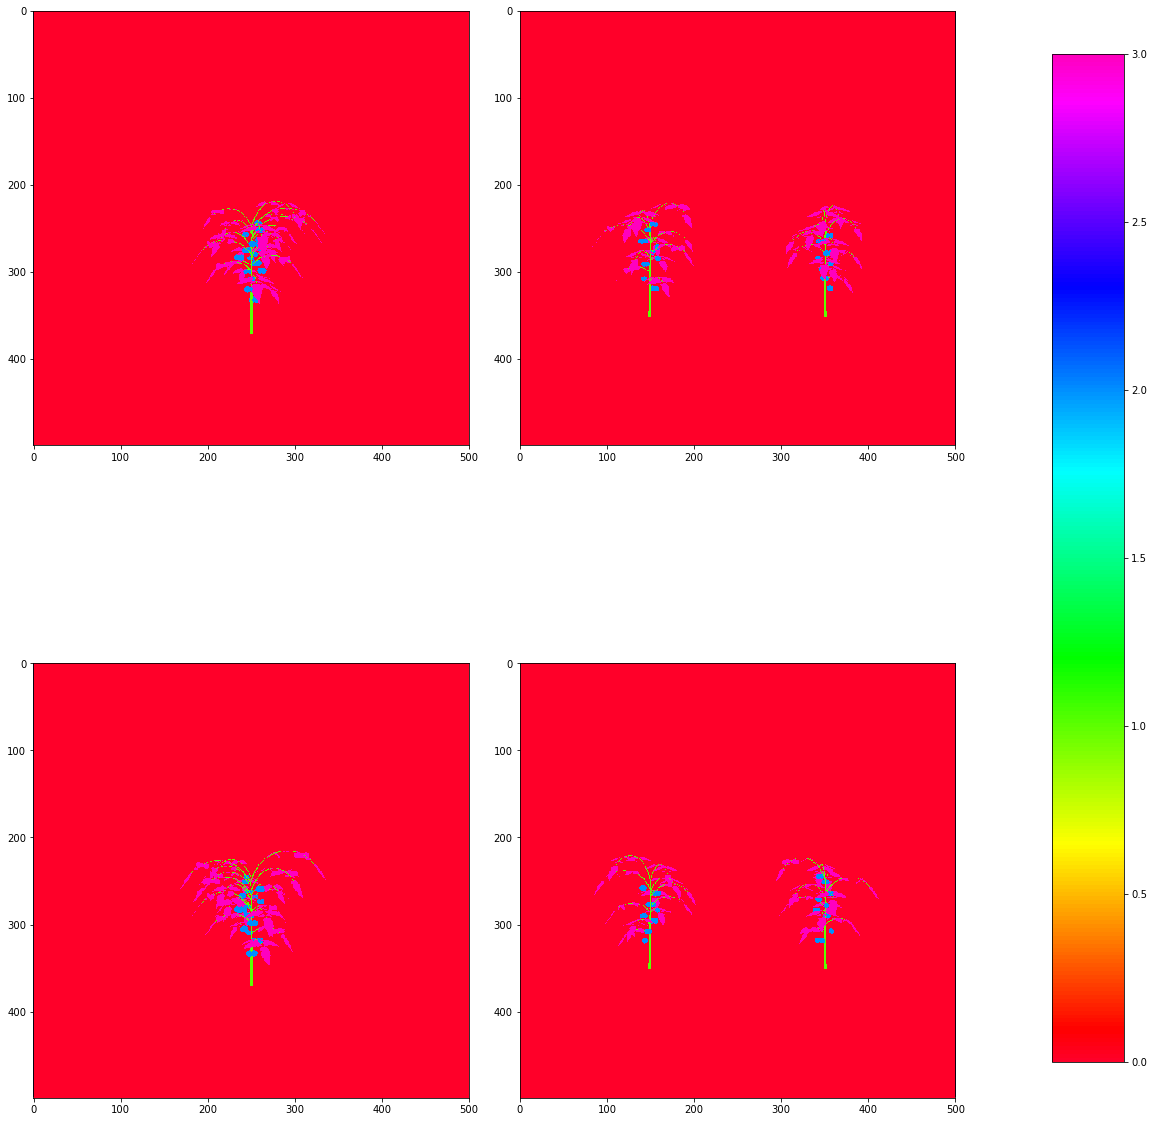

In [33]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViewsSS(path, camera_positions)

### Strawberry

Parameters that you can modify in this crop:

    <StrawberryParameters>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <clusters_per_stem>0.6</clusters_per_stem>
      <fruit_radius>0.025</fruit_radius>
      <fruit_subdivisions>12.0</fruit_subdivisions>
      <leaf_length>0.1</leaf_length>
      <leaf_subdivisions>4.0 4.0</leaf_subdivisions>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.5977829276471345</plant_height>
      <plant_spacing>0.5</plant_spacing>
      <row_spacing>1.5</row_spacing>
      <stem_color>0.35 0.45 0.2</stem_color>
      <stem_radius>0.005</stem_radius>
      <stem_subdivisions>10.0</stem_subdivisions>
      <stems_per_plant>50.0</stems_per_plant>
    </StrawberryParameters>

In [34]:
# ---------------- CANOPY TYPE  -------------------
k = 'Strawberry'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[5, 1],[1, 1]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='leaves, branches, fruits', output_directory='..') 

0
1
2
Generation synthetic data: #0
-- Symbol prefix: 


-- Loading 3 plug-ins
-- loading plug-in visualizer


-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h
-- Using X11 for window creation


DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib


make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_params_image.xml...Building canopy of strawberry plants...done.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 30.976K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00003/RGB_rendering.jpeg
done.
Generating labeled image containing 3 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and element: 
branches
clusters
leaves
Semantic segmentation ... done.
Perfo

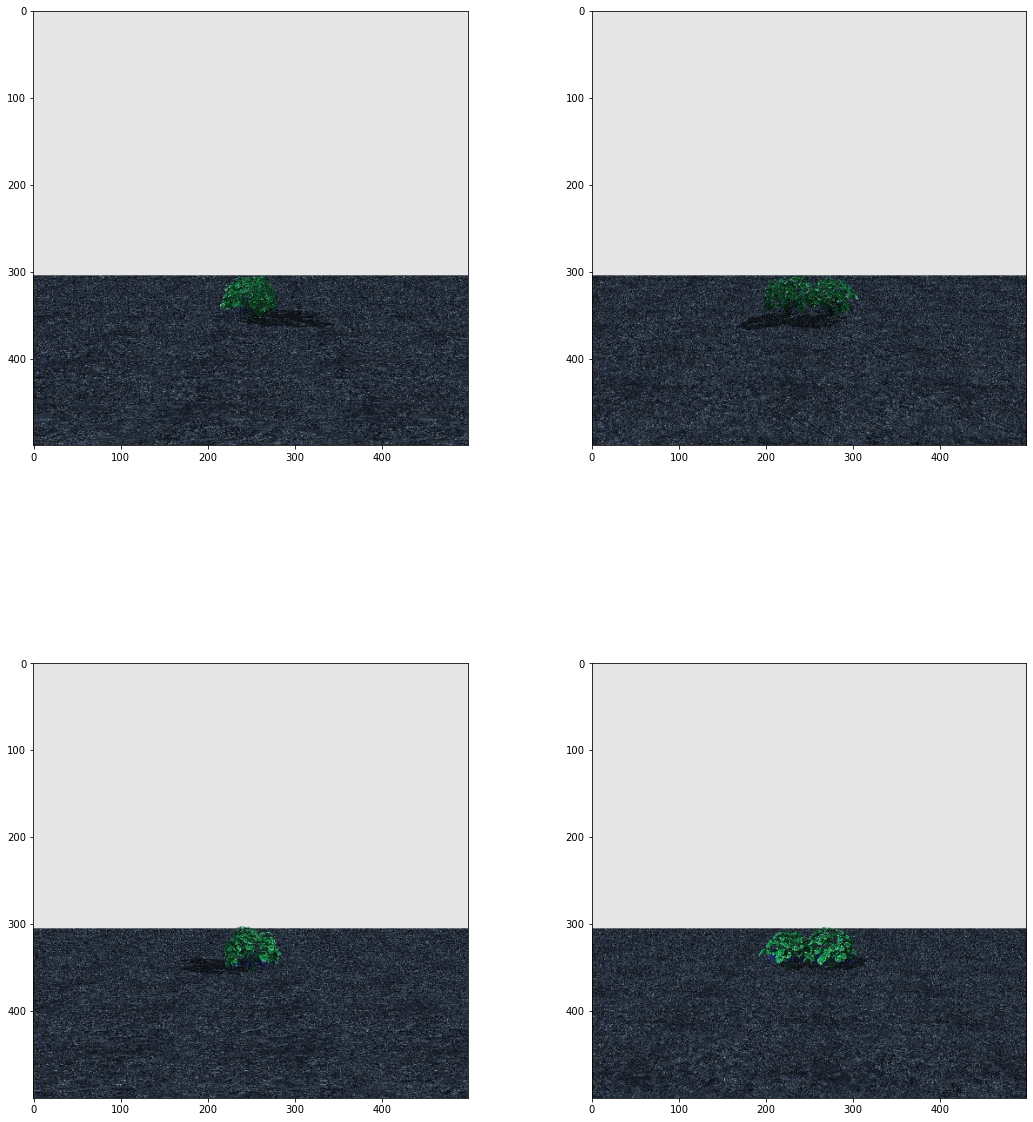

In [35]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViews(path, camera_positions)

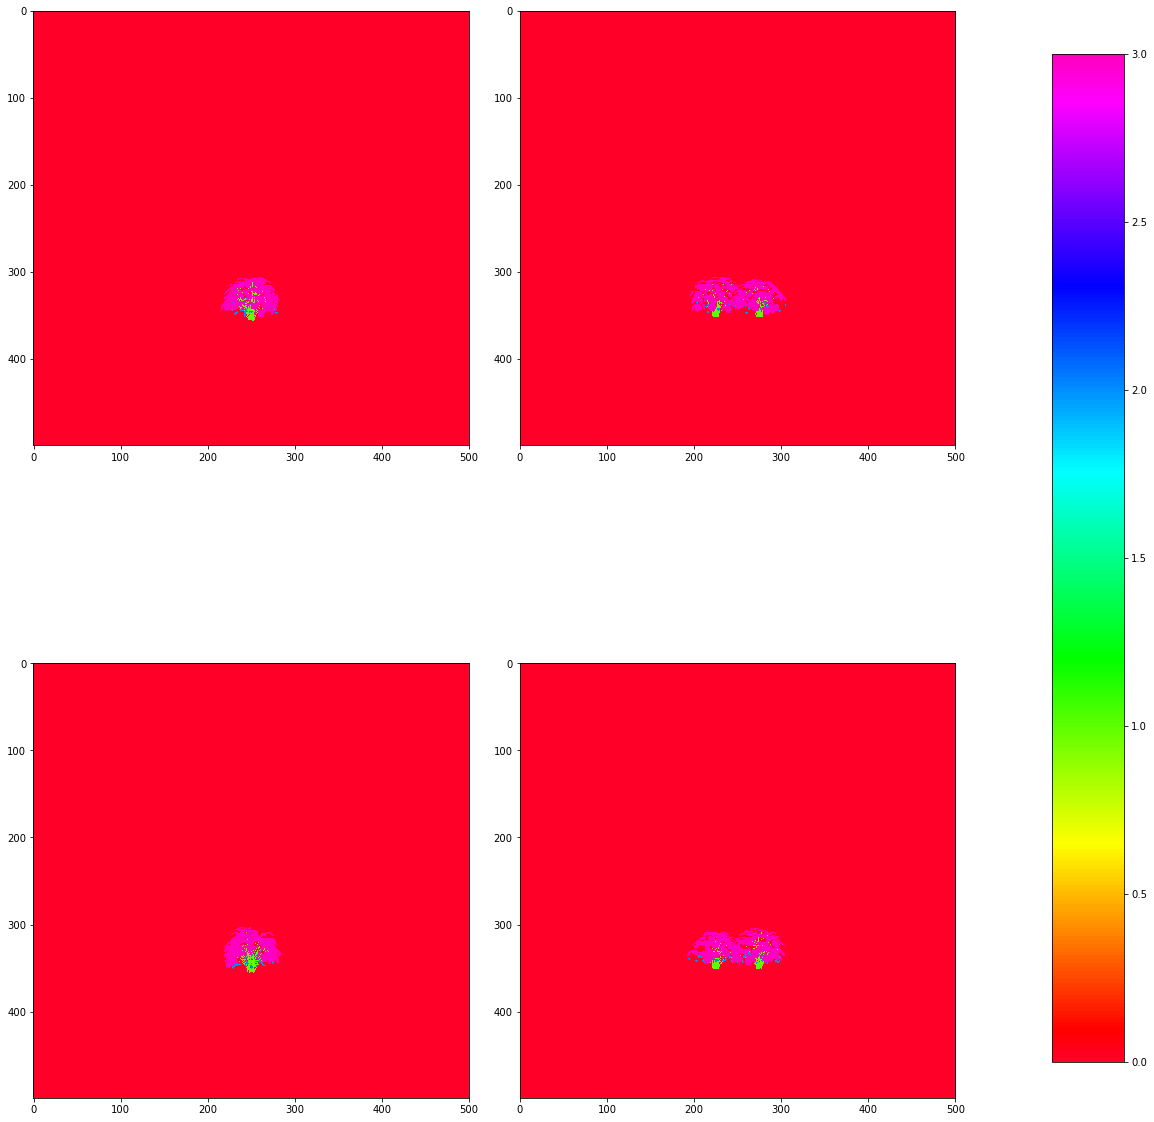

In [36]:
plt.rcParams['figure.figsize'] = [20, 20]
path = '/home/dariojavo/Documents/UCDavis/output/images/'
PlotAllViewsSS(path, camera_positions)